In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train=pd.read_csv("/home/kali/Documents/lp/dl/Dataset/fashion-mnist_train.csv")
df_test=pd.read_csv("/home/kali/Documents/lp/dl/Dataset/fashion-mnist_test.csv")

In [3]:
x_train=df_train.drop(['label'],axis=1).values
y_train=df_train['label'].values
x_test=df_test.drop(['label'],axis=1).values
y_test=df_test['label'].values

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
x_train=x_train.reshape(60000,28,28)
x_test=x_test.reshape(10000,28,28)

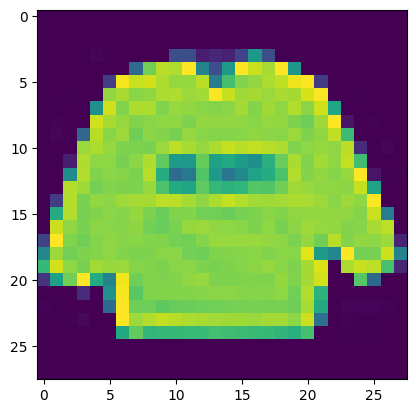

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,Conv2D


2023-05-29 15:59:06.423652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 15:59:06.800749: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 15:59:06.806590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 15:59:09.834344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation="relu"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['Accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test))

2023-05-29 15:59:14.567923: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


   2/1875 [..............................] - ETA: 2:45 - loss: 10.6794 - Accuracy: 0.0312   

2023-05-29 15:59:17.895250: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.
2023-05-29 15:59:17.895714: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.
2023-05-29 15:59:17.953837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.
2023-05-29 15:59:17.954039: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.


1875/1875 [==============================] - 83s 43ms/step - loss: 2.4896 - Accuracy: 0.1009 - val_loss: 2.3026 - val_Accuracy: 0.1000


In [16]:
# classes=[0,1,2,3,4,5,6,7,8,9]
classes=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','shirt','sneaker','bag','Ankleboot']
predict=model.predict(x_test)
print(classes[np.argmax(predict[0])])
classes[y_test[0]]

313/313 [==============================] - 5s 17ms/step
T-shirt


'T-shirt'

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy*100)

313/313 [==============================] - 5s 17ms/step - loss: 2.3026 - Accuracy: 0.1000
2.30259108543396
10.000000149011612
